In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data =pd.read_csv('zomato.csv', encoding='latin-1')
data.shape

(9551, 21)

# Removing Outliers

## Using IQR based strategy for Removal of OUTLIERS

In [100]:
outlier_free_data = data.copy()
for i, cols in enumerate(data.select_dtypes(include=np.number)):
    q1 = data[cols].quantile(0.25)
    q3 = data[cols].quantile(0.75)
    iqr = q3-q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    outlier_free_data = outlier_free_data[(outlier_free_data[cols] <= high) & (outlier_free_data[cols] >= low)]
outlier_free_data = outlier_free_data.reset_index().drop(columns=['index'])
outlier_free_data


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
1,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16
2,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,8
3,301729,Raju Dhaba,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,8
4,301731,Rakheja Bakery,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,302421,Shree Rathnam,1,Noida,"309, 3rd Floor, The Great India Place, Sector ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.326138,28.568013,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,139
4700,5689,Thaal Vaadi,1,Noida,"310/311, 3rd Floor, The Great India Place Mall...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.326138,28.568013,"North Indian, Rajasthani",...,Indian Rupees(Rs.),No,No,No,No,3,3.5,Yellow,Good,249
4701,2979,Chopaal,1,Noida,"A-2, 3rd Floor, The Great India Place Mall, Se...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325308,28.567150,"Chinese, North Indian, South Indian, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,2.0,Red,Poor,161
4702,2025,Moti Mahal Delux Tandoori Trail,1,Noida,"Food Court, The Great India Place Mall, Sector...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325445,28.567040,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,2.0,Red,Poor,108


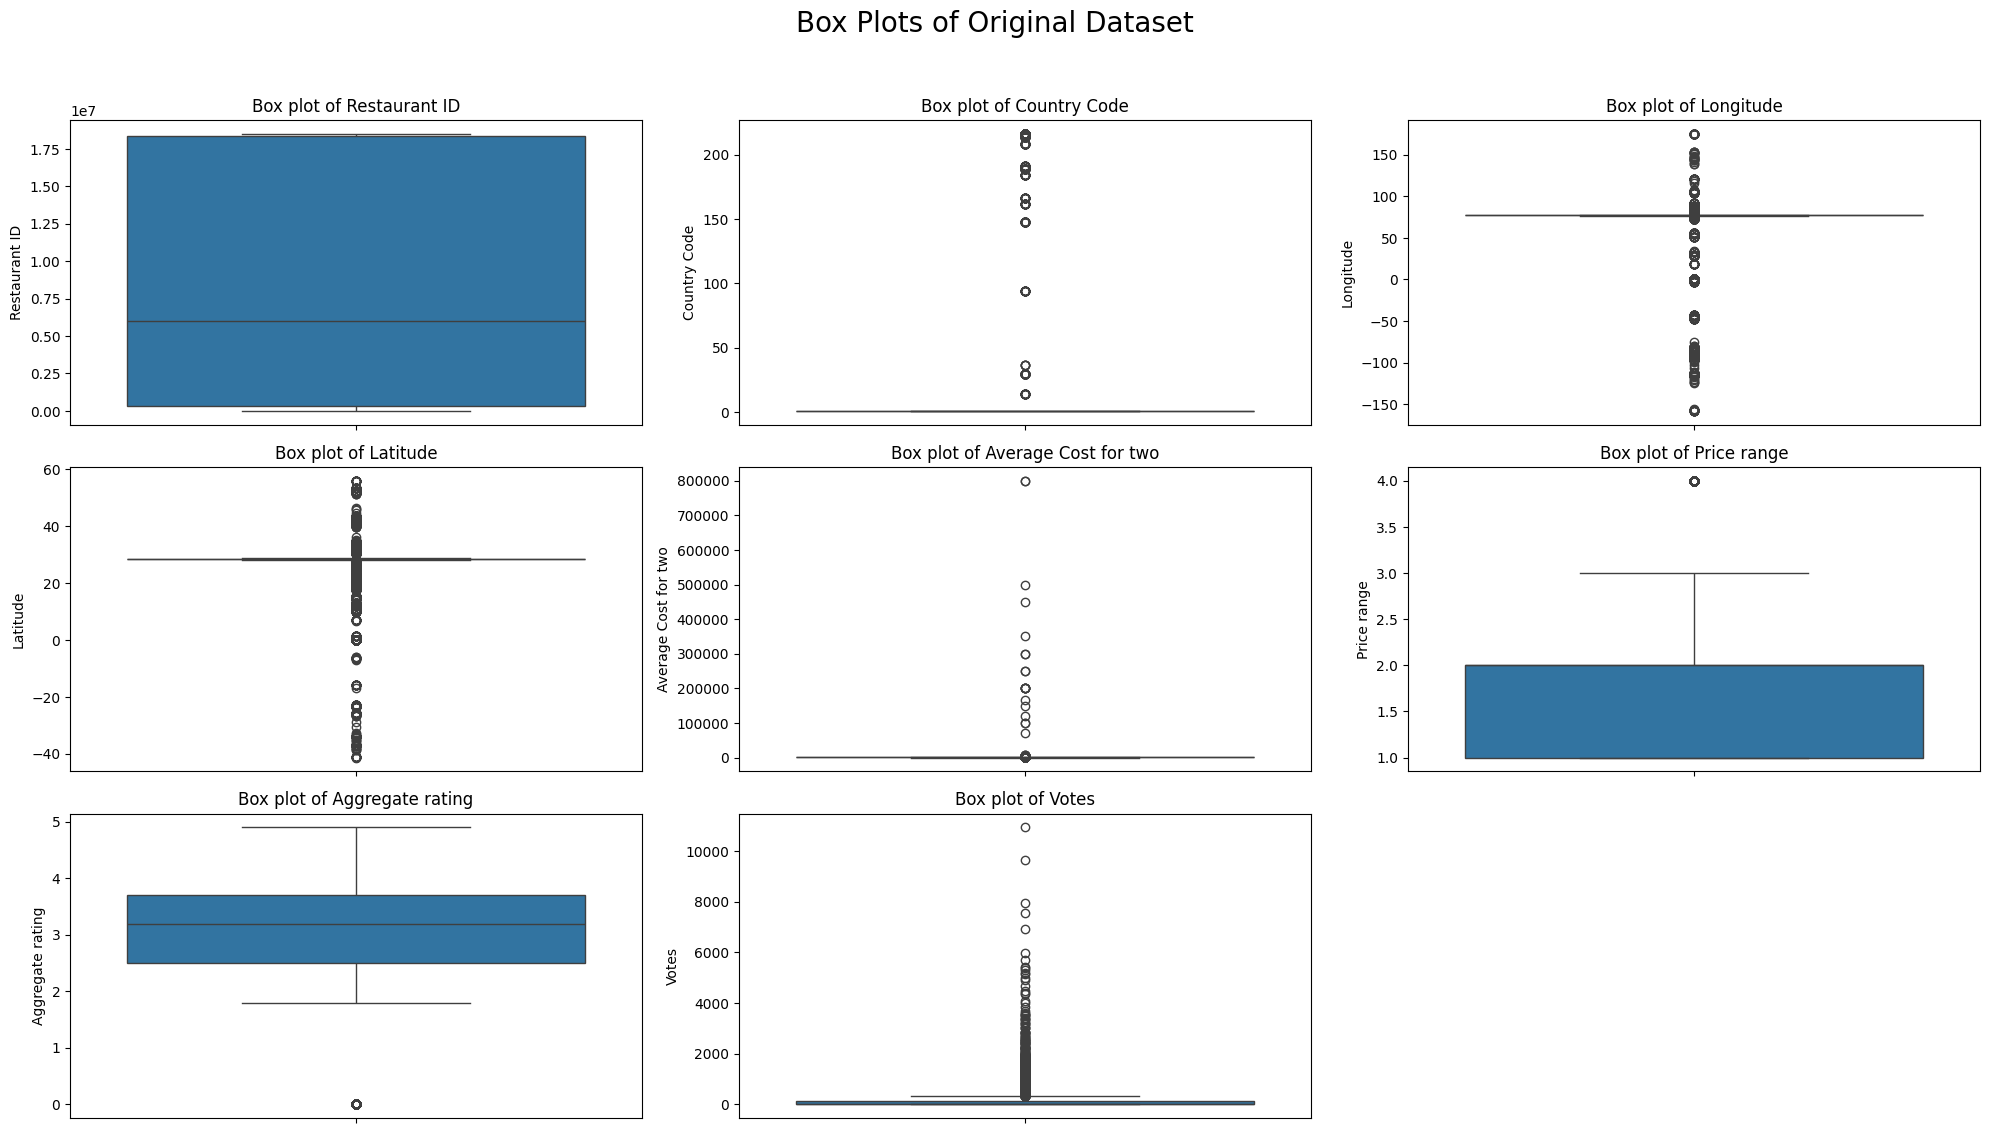

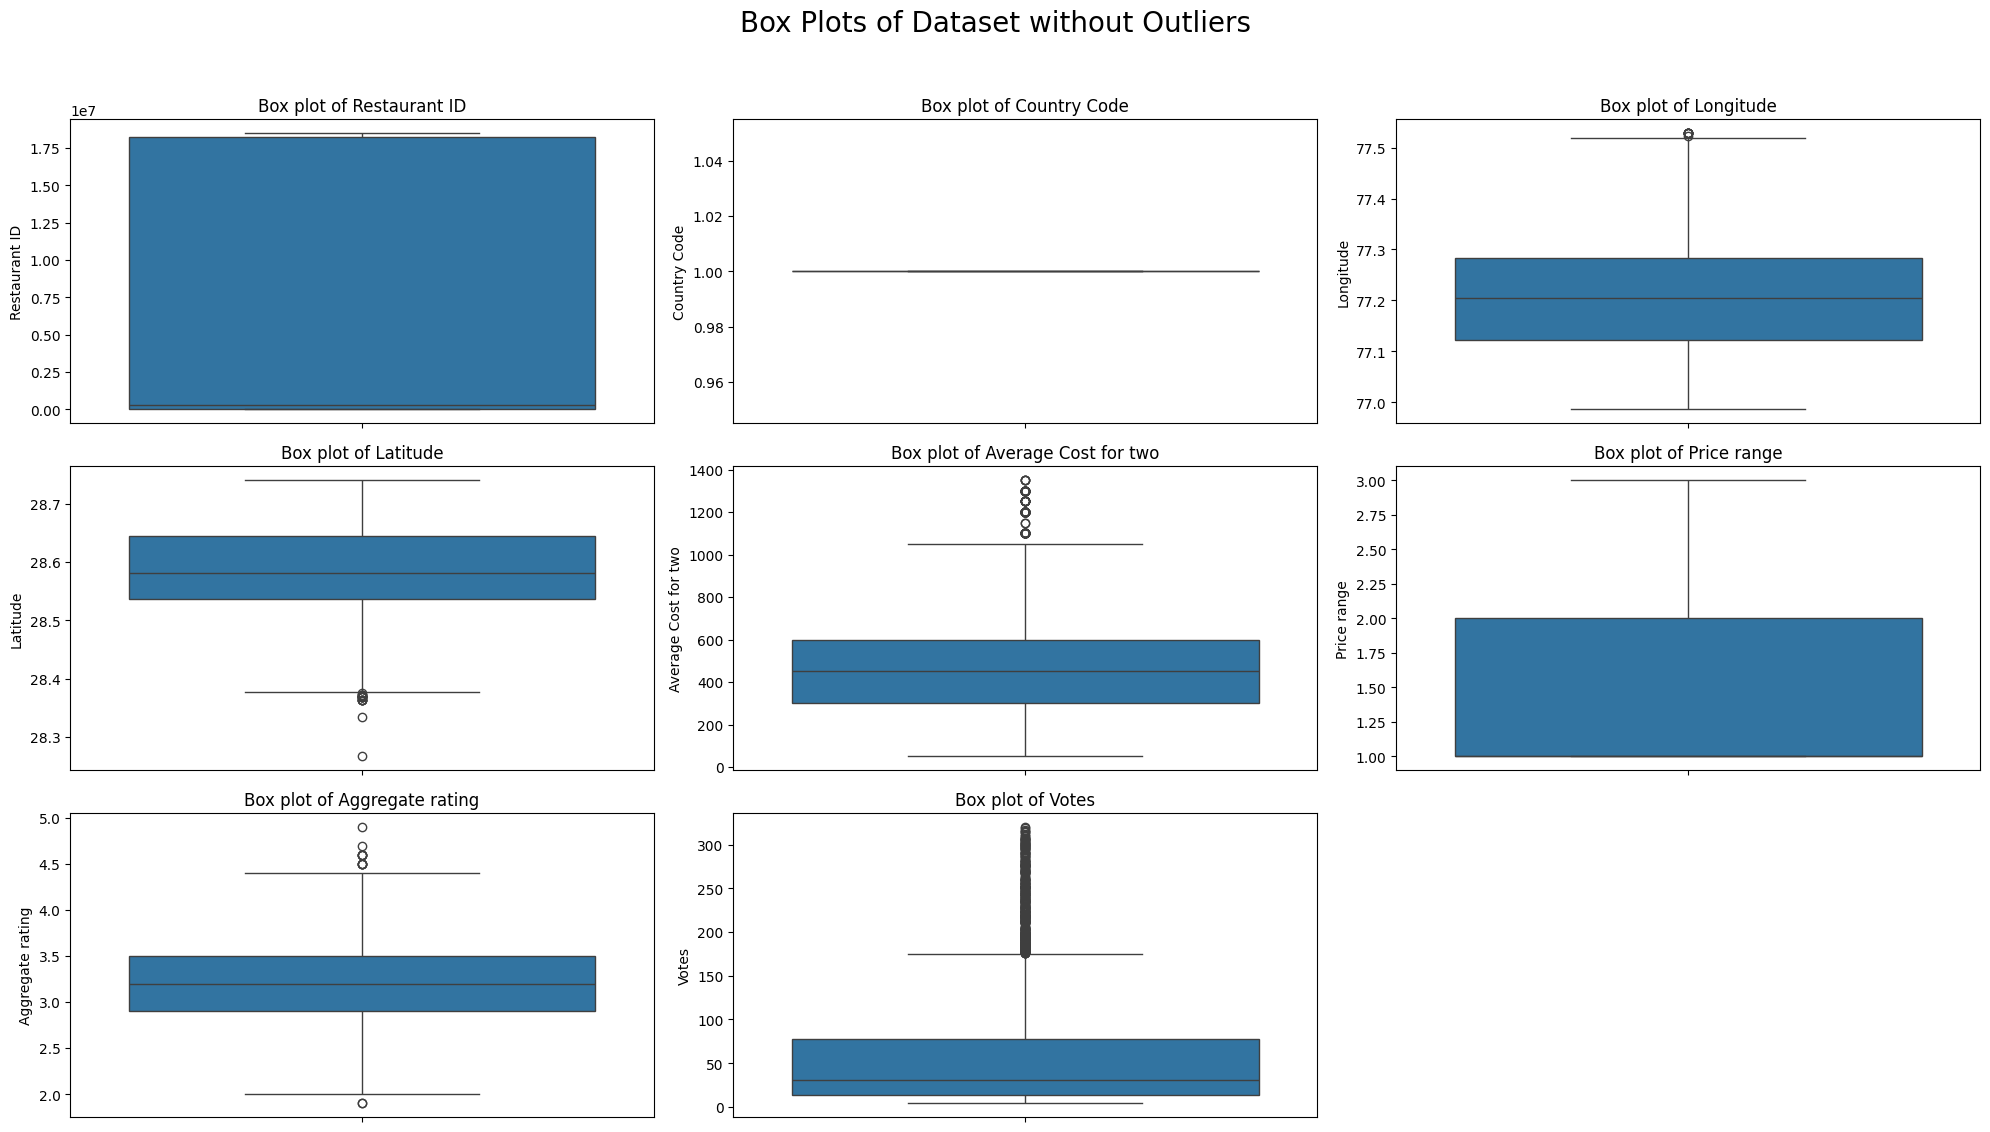

In [101]:
plt.figure(figsize=(20, 15))
plt.suptitle('Box Plots of Original Dataset', fontsize=20)
for i, column in enumerate(data.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=data, y=column)
    plt.title(f'Box plot of {column}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot box plots for the dataset without outliers
plt.figure(figsize=(20, 15))
plt.suptitle('Box Plots of Dataset without Outliers', fontsize=20)
for i, column in enumerate(outlier_free_data.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=outlier_free_data, y=column)
    plt.title(f'Box plot of {column}')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## After Removal of Outliers we remain with only 4704 rows

### Talking about main reasons to remove outliers is that if we train any ML model with outliers in the data, the model may be suboptimal such as shown in the given example, as the loss for these datapoints is high and it affects overall model performance, so the removal of them is the best solution
![Alt text](Simple-Linear-Regression-include-outliers_W640.jpg "a title")

# Finding Null Values in the dataset

In [102]:
outlier_free_data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [103]:
outlier_free_data.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                False
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

In [104]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [105]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Checking Country-Code.xlsx 

In [106]:
country_code = pd.read_excel('Country-Code.xlsx')
country_code = country_code.set_index('Country Code')

In [107]:
country_code

,Country
Country Code,
1,India
14,Australia
30,Brazil
37,Canada
94,Indonesia
148,New Zealand
162,Phillipines
166,Qatar
184,Singapore


In [132]:
data['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208])

## Yes we can merge as we have the mappings of all Different COuntry Codes in the excel file.

In [108]:
new_df = pd.DataFrame(columns=['Country'])
for i, pos in enumerate(outlier_free_data['Country Code']):
    new_df.loc[i] = country_code.loc[pos]
outlier_free_data = pd.concat([new_df, outlier_free_data], axis=1)

new_df = pd.DataFrame(columns=['Country'])
for i, pos in enumerate(data['Country Code']):
    new_df.loc[i] = country_code.loc[pos]
data = pd.concat([new_df, data], axis=1)

In [109]:
outlier_free_data

,Country,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,India,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
1,India,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,...,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16
2,India,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,8
3,India,301729,Raju Dhaba,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.306102,28.490098,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,8
4,India,301731,Rakheja Bakery,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305745,28.490062,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,India,302421,Shree Rathnam,1,Noida,"309, 3rd Floor, The Great India Place, Sector ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.326138,28.568013,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,139
4700,India,5689,Thaal Vaadi,1,Noida,"310/311, 3rd Floor, The Great India Place Mall...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.326138,28.568013,...,Indian Rupees(Rs.),No,No,No,No,3,3.5,Yellow,Good,249
4701,India,2979,Chopaal,1,Noida,"A-2, 3rd Floor, The Great India Place Mall, Se...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325308,28.567150,...,Indian Rupees(Rs.),No,No,No,No,1,2.0,Red,Poor,161
4702,India,2025,Moti Mahal Delux Tandoori Trail,1,Noida,"Food Court, The Great India Place Mall, Sector...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325445,28.567040,...,Indian Rupees(Rs.),Yes,Yes,No,No,3,2.0,Red,Poor,108


In [110]:
import plotly.express as px
px.pie(data_frame=outlier_free_data, names='Country', values='Country Code')

In [126]:
import plotly.express as px

px.pie(data_frame=data, names='Country')

### In Complete Data, top 3 Countries are India, United States, United Kingdom
### In Outlier Free data, only India is present

In [128]:
data['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [129]:
data['Rating color'].value_counts()

Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64

In [130]:
data['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64